<a href="https://colab.research.google.com/github/LuchoValr/The-effect/blob/main/cap15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulacion, generando datos aleatorios de manera general



In [5]:
import pandas as pd
import numpy as np

In [6]:
# If we want the results to be the same
# every time, set a seed
np.random.seed (1000)

In [14]:
# Create a DataFrame with pd.DataFrame. The size argument of the random
# functions gives us the number of observations
d = pd.DataFrame ({
    # normal data is by default mean 0, sd 1
    'eps': np.random.normal(size = 200),
    # Uniform data is by default from 0 to 1
    'Y': np.random.uniform(size = 200),
    # We can use binomial to make binary data
    # with unequal probabilities
    'X': np.random.binomial(1, .2, size = 200)})

In [15]:
d.head()

,eps,Y,X
0,-1.901935,0.052304,1
1,0.384687,0.800437,0
2,0.053944,0.597593,0
3,0.425959,0.926496,0
4,-0.207438,0.714972,1


#Generando datos relacionados a un diagrama causal

In [17]:
np.random.seed (1000)

In [18]:
#Create a DataFrame with pd.Dataframe. 
#the size argument of the random functions gives us the number of observations
d = pd.DataFrame({
    #have W go to 0 to 0.1
    'W' : np.random.uniform(0, .1, size = 200)
})
#Higher W makes X = 1 more likely
d['X'] = np.random.uniform(size = 200) < .2 +d['W']

#The tur effect of X on Y is 3
d['Y'] = 3*d['X'] + d['W'] + np.random.normal(size = 200)

#Simulacion repetidas veces

In [19]:
# Make sure the seed goes OUTSIDE the function. It makes the random data
# the same every time, but we want DIFFERENT results each time we run it
# (but the same set of different results , thus the seed)
np.random.seed (1000)

In [20]:
# Make a function with def. The "N = 200" argument gives it an argument N
# that we'll use for sample size. The "=200" sets the default to 200
def create_data(N = 200):
  d = pd.DataFrame ({
      'W': np.random.uniform(0, .1, size = N)})
  d['X'] = np.random.uniform(size = N) < .2 + d['W']
  d['Y'] = 3*d['X'] + d['W'] + np.random.normal(size = N)
  # Use return() to send our created data back
  return(d)

In [25]:
# And run our function!
create_data(500)

,W,X,Y
0,0.099325,False,-1.957351
1,0.018208,True,3.755833
2,0.063352,False,0.170981
3,0.000723,False,-2.027802
4,0.021786,False,0.855351
...,...,...,...
495,0.003896,True,3.825905
496,0.044292,False,1.358666
497,0.028269,False,1.255625
498,0.065753,False,0.618693


#Crear un identificador individual para crear multiples observaciones por individuo

In [26]:
from itertools import product

In [27]:
np.random.seed (1000)

In [28]:
# N for number of individuals , T for time periods
def create_panel_data(N = 200, T = 10):
  # Use product() to get all combinations of individual and
  # time (if you want some to be incomplete , drop later)
  p = pd.DataFrame(product(range(0,N), range(0, T)))
  p.columns = ['ID','t']

  # Individual - and time-varying variable
  p['W1'] = np.random.normal(size = N*T)

  # Individual data
  indiv_data = pd.DataFrame ({
      'ID': range(0,N),
      'W2': np.random.normal(size = N)})
  # Bring them together
  p = p.merge(indiv_data , on = 'ID')

  # Create X, caused by W1 and W2
  p['X'] = 2*p['W1'] + 1.5*p['W2'] + np.random.normal(size = N*T)
  # And create Y. The true effect of X on Y is 3
  # But W1 and W2 have causal effects too
  p['Y'] = 3*p['X'] + p['W1']- 2*p['W2'] + np.random.normal(size = N*T)
  return(p)

In [29]:
create_panel_data (100, 5)

,ID,t,W1,W2,X,Y
0,0,0,-0.804458,-0.147413,-0.650478,-4.079039
1,0,1,0.320932,-0.147413,0.115530,-0.272740
2,0,2,-0.025483,-0.147413,-1.247619,-2.886001
3,0,3,0.644324,-0.147413,0.615078,3.660663
4,0,4,-0.300797,-0.147413,0.252860,-0.657527
...,...,...,...,...,...,...
495,99,0,1.199292,-0.153225,1.018079,1.521043
496,99,1,1.047348,-0.153225,1.702046,7.644380
497,99,2,0.395852,-0.153225,-1.107167,-2.035937
498,99,3,-0.361657,-0.153225,-2.288311,-7.205319


#Creando Heterocedasticidad, osea correlacion en los errores

In [30]:
np.random.seed(1000)

In [31]:
def create_het_data(N = 200):
  d = pd.DataFrame({
      'X': np.random.uniform(size = N)})
  # Let the standard deviation of the error
  # Be related to X. Heteroskedasticity!
  d['Y'] = 3*d['X'] + np.random.normal(scale = 5*d['X'])
  return(d)

In [35]:
df = create_het_data(500)
df.head()

,X,Y
0,0.033896,-0.063441
1,0.826406,2.925880
2,0.739247,4.965752
3,0.969450,7.943964
4,0.235853,1.138559


In [33]:
import seaborn as sns

<Axes: xlabel='X', ylabel='Y'>

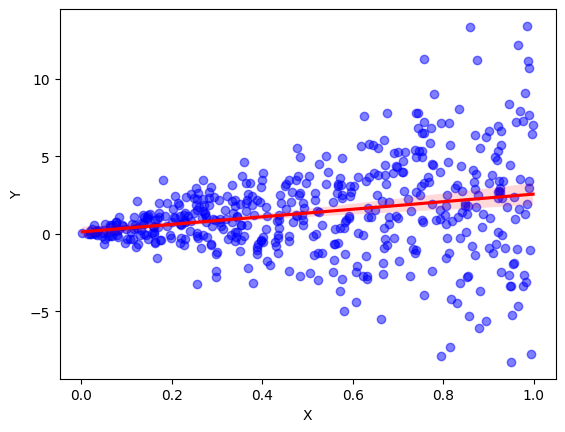

In [38]:
sns.regplot(x = "X", y = "Y", scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}, data = df)


#Creando Clustering

In [39]:
np.random.seed (1000)

In [40]:
# N for number of individuals , T for time periods
def create_clus_data(N = 200, T = 10):
  # We're going to create errors clustered at the
  # ID level. So we can follow our steps from making panel data
  p = pd.DataFrame(
      product(range(0,N), range(0, T)))
  p.columns = ['ID','t']
  # Individual - and time-varying variable
  p['W'] = np.random.normal(size = N*T)
  # Now an individual -specific error cluster
  indiv_data = pd.DataFrame ({
      'ID': range(0,N),
      'C': np.random.normal(size = N)})
  # Bring them together
  p = p.merge(indiv_data , on = 'ID')

  # Create X
  p['X'] = 2*p['W'] + np.random.normal(size = N*T)

  # And create Y. The error term has two components: the individual
  # cluster C, and the individual -and-time-varying element
  p['Y'] = 3*p['X'] + (p['C'] + np.random.normal(size = N*T))
  return(p)

In [41]:
create_clus_data (100, 5)

,ID,t,W,C,X,Y
0,0,0,-0.804458,-0.147413,-0.429357,-3.053461
1,0,1,0.320932,-0.147413,0.336650,-0.372551
2,0,2,-0.025483,-0.147413,-1.026499,-2.639398
3,0,3,0.644324,-0.147413,0.836198,3.237459
4,0,4,-0.300797,-0.147413,0.473980,-0.135610
...,...,...,...,...,...,...
495,99,0,1.199292,-0.153225,1.247915,0.551587
496,99,1,1.047348,-0.153225,1.931883,6.826869
497,99,2,0.395852,-0.153225,-0.877330,-2.201952
498,99,3,-0.361657,-0.153225,-2.058474,-6.613825


#Creacion de estimador

In [42]:
import statsmodels.formula.api as smf

In [43]:
np.random.seed (1000)

In [44]:
def est_model(N = 200, T = 10):
  # This uses create_clus_data from earlier
  d = create_clus_data(N, T)
  # Run a model that should be unbiased
  # if clustered errors themselves don't bias us!
  m = smf.ols('Y ~ X + W', data = d).fit()
  # Get the coefficient on X, which SHOULD be true value 3 on average
  x_coef = m.params['X']
  return(x_coef)


In [45]:
# Estimate our model!
est_model (200, 5)

2.9965841199123844

#Creando iteraciones y guardando resultados

In [46]:
np.random.seed (1000)

In [49]:
# This runs est_model once for each iteration as it iterates through
# the range from 0 to 999 (1000 times total)
estimates = [est_model (200, 5) for i in range(0 ,1000)]

#Estimador de Agus para ejemplificar el como podemos probar diferentes estimaciones

In [50]:
np.random.seed (1000)

In [53]:
# Data creation function. Let's also make the function more
# flexible - we can choose our own true effect!
def create_data(N, true):
  d = pd.DataFrame ({'X': np.random.normal(size = N)})
  d['Y'] = true*d['X'] + np.random.normal(size = N)
  return(d)

# Estimation function. keep is the portion of data in each tail
# to keep. So .2 would keep the bottom and top 20% of X
def est_model(N, keep , true):
  d = create_data(N, true)
  # Agus' estimator!
  d = d.loc[(d['X'] <= np.quantile(d['X'], keep)) | (d['X'] >= np.quantile(d['X'], 1-keep ))]
  m = smf.ols('Y~X', data = d).fit()
  # Return the two things we want as an array
  ret = [m.params['X'], m.bse['X']]
  return(ret)

# Estimate the results 1000 times
results = [est_model (1000, .2, 2) for i in range(0 ,1000)]

# Turn into a DataFrame
results = pd.DataFrame(results , columns = ['coef', 'se'])


In [54]:
# Let's see what we got!
print(np.mean(results['coef']), 
      np.std(results['coef']), 
      np.mean(results['se']))

2.0012599391349966 0.03354430285976157 0.033925103552338805


#Comparando el estimador de agus con una regresion normal

In [59]:
np.random.seed (1000)

In [64]:
def est_model(N, keep , true):
  d = create_data(N, true)

  #Regular estimator
  m1 = smf.ols('Y ~ X', data = d).fit()
  # Agus' estimator!
  d = d.loc[(d['X'] <= np.quantile(d['X'], keep)) | (d['X'] >= np.quantile(d['X'], 1-keep ))]
  m2 = smf.ols('Y ~ X', data = d).fit()
  # Return the two things we want as an array
  ret = [m1.params['X'], m2.params['X']]
  return(ret)

# Estimate the results 1000 times
results = [est_model(1000, .2, 2) for i in range(0 ,1000)]

# Turn into a DataFrame
results = pd.DataFrame(results , columns = ['coef_reg', 'coef_agus'])

In [65]:
# Let's see what we got!
print(np.mean(results['coef_reg']), 
      np.std(results['coef_reg']), 
      np.mean(results['coef_agus']),
      np.std(results['coef_agus']))

2.00059892469004 0.031731548160315835 2.001200487221355 0.03351225268463108


#Cuanto sesgo tenemos

In [66]:
np.random.seed (1000)

In [69]:
# Have settings for strength of W -> X and for W -> Y
# These are relative to the standard deviation
# of the random components of X and Y, which are 1 each
# (np.random.normal() defaults to a standard deviation of 1)
def create_data(N, effectWX , effectWY ):
  d = pd.DataFrame ({'W': np.random.normal(size = N)})
  d['X'] = effectWX*d['W'] + np.random.normal(size = N)
  # True effect is 5
  d['Y'] = 5*d['X'] + effectWY*d['W'] + np.random.normal(size = N)
  return(d)

In [70]:
# Our estimation function
def est_model(N, effectWX , effectWY ):
  d = create_data(N, effectWX , effectWY)
  # Biased estimator - no W control!
  # But how bad is it?
  m = smf.ols('Y~X', data = d).fit()
  return(m.params['X'])
  

In [71]:
# Iteration function! Option iters determines number of iterations
def iterate(N, effectWX , effectWY , iters):
  results = [est_model(N, effectWX , effectWY) for i in range(0,iters)]
  # We want to know *how biased* it is, so compare to true-effect 5
  return(np.mean(results) - 5)
  

In [72]:
# Now try different settings to see how bias changes!
# Here we'll use a small number of iterations (200) to
# speed things up, but in general bigger is better
# Should be unbiased
iterate (2000, 0, 0, 200)

0.0013228526594026846

In [73]:
# Should still be unbiased
iterate (2000, 0, 1, 200)

0.005003578952882393

In [75]:
# How much bias?
iterate (2000, 1, 1, 200)

0.499453110673703

In [76]:
# Now?
iterate (2000, .1, .1, 200)

0.009435883170572978

In [78]:
# Does it make a difference whether the effect
# is stronger on X or Y?
iterate (2000, .5, .1, 200)

0.03895755765990394

In [79]:
iterate (2000, .1, .5, 200)

0.049245786348558696

#Power analysis simulation

In [80]:
np.random.seed (1000)


In [84]:
# Follow the description in the text for data creation. Since we want to
# get minimum sample size and minimum detectable effect , allow both sample
# size and effect to vary.
# diff is the difference in effects between boys and girls
def create_data(N, effect , diff):
  d = pd.DataFrame ({'W': np.random.normal(size = N),
                     'girl': np.random.randint(2, size = N)})
  # A one-SD change in W makes treatment 10% less likely
  d['Training'] = np.random.uniform(size = N) + .1*d['W'] < .5
  d['Test'] = effect*d['Training'] + diff*d['girl']*d['Training']
  d['Test'] = d['Test'] + 4*d['W'] + np.random.normal(scale = 9, size = N)
  return(d)

# Our estimation function
def est_model(N, effect , diff):
  d = create_data(N, effect , diff)
  # Our model
  m = smf.ols('Test~girl*Training + W', data = d).fit()
  # By looking we can spot that the name of the
  # interaction term is girl:Training[T.True]
  sig = m.pvalues['girl:Training[T.True]'] < .05
  return(sig)

# Iteration function!
def iterate(N, effect , diff , iters):
  results = [est_model(N, effect , diff) for i in range(0,iters)]
  # We want to know statistical power ,
  # i.e., the proportion of significant results
  return(np.mean(results))


In [88]:
# Let's find the minimum sample size
mss = [[N, iterate(N, 2, .8, 500)] for
       N in [10000 , 15000, 20000, 25000]]

In [89]:
# Look for the first N with power above 90%
pd.DataFrame(mss , columns = ['N','Power'])

,N,Power
0,10000,0.594
1,15000,0.792
2,20000,0.870
3,25000,0.944


In [87]:
# Now for the minimum detectable effect
mde = [[diff , iterate (2000, 2, diff , 500)] for
       diff in [.8, 1.6, 2.4, 3.2]]
pd.DataFrame(mde , columns = ['Effect', 'Power'])

,Effect,Power
0,0.8,0.178
1,1.6,0.526
2,2.4,0.850
3,3.2,0.976


#Boostrap by hand

In [90]:
# Get our data to bootstrap
iris = sns.load_dataset('iris')

In [91]:
def create_boot(d):
  N = d.shape [0]
  index = np.random.randint(0, N, size = N)
  d = d.iloc[index]
  return(d)

In [92]:
# Create a bootstrap sample
create_boot(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
61,5.9,3.0,4.2,1.5,versicolor
95,5.7,3.0,4.2,1.2,versicolor
103,6.3,2.9,5.6,1.8,virginica
18,5.7,3.8,1.7,0.3,setosa
...,...,...,...,...,...
54,6.5,2.8,4.6,1.5,versicolor
132,6.4,2.8,5.6,2.2,virginica
108,6.7,2.5,5.8,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica


#Boostrap by hand automatico

In [126]:
!pip install resample
from resample.bootstrap import bootstrap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
# Get our data to bootstrap
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis = 1)

In [162]:
# Estimation - the first argument should be for the bootstrapped data
def est_model(d):
  # bootstrap() makes an array , not a DataFrame
  d = pd.DataFrame(d)
  # Oh also it tossed out the column names
  d.columns = iris.columns
  # And numeric types
  d = d.astype(float)
  print(d.dtypes)
  m = smf.ols(formula = 'sepal_length ~ sepal_width + petal_length ',
              data = d).fit()
  coefs = [m.params['sepal_width'], m.params['petal_length']]
  return(coefs)


In [163]:
# Bootstrap the iris data, estimate with est_model , and do it 1000 times
b = bootstrap(sample = iris , fn = est_model , size = 1000)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
sepal_leng

In [164]:
# Get our standard errors
bDF = pd.DataFrame(b, columns = ['SW','PL'])
bDF.std()

SW    0.065763
PL    0.016532
dtype: float64

#Cluster bootstrap

In [167]:
np.random.seed(100)

In [168]:
# Example data
d = pd.DataFrame ({'ID': [1,1,2,2,3,3],
                   'X': [1,2,3,4,5,6]})

In [169]:
# Now, get our data frame just of IDs
IDs = pd.DataFrame ({'ID': np.unique(d['ID'])})

In [170]:
# Our bootstrap resampling function
def create_boot(d, IDs):
  # Resample our ID data
  N = IDs.shape [0]
  index = np.random.randint(0, N, size = N)
  bs_ID = IDs.iloc[index]
  # And our full data
  bs_d = d.merge(bs_ID , how = 'inner', on = 'ID')
  return(bs_d)
  

In [171]:
# Create a cluster bootstrap data set
create_boot(d, IDs)

,ID,X
0,1,1
1,1,1
2,1,1
3,1,2
4,1,2
5,1,2
